In [31]:
import csv
import numpy as np
import pandas as pd
import warnings
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from keras.layers import Input, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential
from keras import optimizers
from sklearn.model_selection import train_test_split

# used for reference: https://rickyhan.com/jekyll/update/2017/09/14/autoencoders.html
# https://keras.io/getting-started/functional-api-guide/

In [3]:
# read data
data = pd.read_csv("Integrated.csv")
data.head(n=10)
data.shape[0]

# reshape data into [samples, timesteps, features]
data = pd.DataFrame(data, columns=['0', '1', '3', '5','7', '10', '14'])
data = data.values
data = data.reshape(3992,7,1)


In [4]:
# CONSTRUCT RNN
inputs = Input(shape=(7,1))
encoded = LSTM(5)(inputs)
#add dense layer; fully connected layer that extracts features; dim=3
midlayer = Dense(3, activation='relu')(encoded)

decoded_1 = RepeatVector(7)(midlayer)
decoded_2 = LSTM(5, return_sequences=True)(decoded_1)
decoded_3 = LSTM(1, return_sequences=True)(decoded_2)


# build autoencoder
autoencoder = Model(inputs, decoded_3)
# build encoder
encoder = Model(inputs, midlayer)

# build decoder
decoder_layer = autoencoder.layers[-1] #get last layer of rnn
encoded_input = Input(shape=(3, )) #get input dimen
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')



x_train, x_testset = train_test_split(data, test_size=0.4, random_state=20)
x_text, x_dev = train_test_split(x_testset, test_size=0.5, random_state=20)

autoencoder.fit(x_train,x_train,epochs=100, validation_data=(x_dev,x_dev))

Train on 2395 samples, validate on 799 samples
Epoch 1/100
2395/2395 [==============================] - 5s 2ms/step - loss: 0.3315 - val_loss: 0.3242
Epoch 2/100
2395/2395 [==============================] - 2s 881us/step - loss: 0.3036 - val_loss: 0.2952
Epoch 3/100
2395/2395 [==============================] - 2s 909us/step - loss: 0.2868 - val_loss: 0.2824
Epoch 4/100
2395/2395 [==============================] - 2s 901us/step - loss: 0.2782 - val_loss: 0.2801
Epoch 5/100
2395/2395 [==============================] - 2s 880us/step - loss: 0.2722 - val_loss: 0.2654
Epoch 6/100
2395/2395 [==============================] - 2s 936us/step - loss: 0.2592 - val_loss: 0.2505
Epoch 7/100
2395/2395 [==============================] - 2s 784us/step - loss: 0.2382 - val_loss: 0.2161
Epoch 8/100
2395/2395 [==============================] - 2s 739us/step - loss: 0.2123 - val_loss: 0.1959
Epoch 9/100
2395/2395 [==============================] - 2s 889us/step - loss: 0.2015 - val_loss: 0.1910
Epoch 10/1

Epoch 78/100
2395/2395 [==============================] - 2s 693us/step - loss: 0.0621 - val_loss: 0.0604
Epoch 79/100
2395/2395 [==============================] - 2s 691us/step - loss: 0.0615 - val_loss: 0.0599
Epoch 80/100
2395/2395 [==============================] - 2s 693us/step - loss: 0.0615 - val_loss: 0.0604
Epoch 81/100
2395/2395 [==============================] - 2s 692us/step - loss: 0.0610 - val_loss: 0.0610
Epoch 82/100
2395/2395 [==============================] - 2s 690us/step - loss: 0.0613 - val_loss: 0.0628
Epoch 83/100
2395/2395 [==============================] - 2s 696us/step - loss: 0.0609 - val_loss: 0.0595
Epoch 84/100
2395/2395 [==============================] - 2s 717us/step - loss: 0.0614 - val_loss: 0.0595
Epoch 85/100
2395/2395 [==============================] - 2s 882us/step - loss: 0.0612 - val_loss: 0.0629
Epoch 86/100
2395/2395 [==============================] - 2s 724us/step - loss: 0.0610 - val_loss: 0.0602
Epoch 87/100
2395/2395 [======================

In [12]:
# attempt to reconstruct test set
x_test = x_text
decoded_data = autoencoder.predict(x_test)


<function matplotlib.pyplot.show(*args, **kw)>

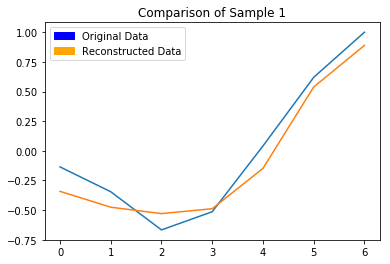

In [32]:
# plot first sample from test set
fig1 = plt.figure()
plt.plot(x_test[0])
plt.plot(decoded_data[0])
blue_patch = mpatches.Patch(color='blue', label='Original Data')
orange_patch = mpatches.Patch(color='orange', label='Reconstructed Data')
plt.legend(handles=[blue_patch,orange_patch])
plt.title('Comparison of Sample 1')
plt.show


In [ ]:
# plot 2nd sample from test set
plt.plot(x_test[1])
plt.plot(decoded_data[1])
blue_patch = mpatches.Patch(color='blue', label='Original Data')
orange_patch = mpatches.Patch(color='orange', label='Reconstructed Data')
plt.legend(handles=[blue_patch,orange_patch])
plt.title('Comparison of Sample 2')
plt.legend()
plt.show


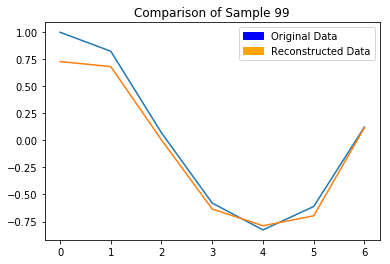

In [63]:
# plot 100th sample from test set
plt.figure() 
sample = 99
plt.plot(x_test[sample])
plt.plot(decoded_data[sample])
sample = str(sample)
blue_patch = mpatches.Patch(color='blue', label='Original Data')
orange_patch = mpatches.Patch(color='orange', label='Reconstructed Data')
plt.legend(handles=[blue_patch,orange_patch])
plt.title('Comparison of Sample ' + sample)
plt.show
plt.savefig('sample'+sample+'.png')

Train on 2395 samples, validate on 799 samples
Epoch 1/100
2395/2395 [==============================] - 9s 4ms/step - loss: 0.3332 - val_loss: 0.3288
Epoch 2/100
2395/2395 [==============================] - 2s 742us/step - loss: 0.3033 - val_loss: 0.2941
Epoch 3/100
2395/2395 [==============================] - 2s 741us/step - loss: 0.2872 - val_loss: 0.2865
Epoch 4/100
2395/2395 [==============================] - 2s 742us/step - loss: 0.2816 - val_loss: 0.2798
Epoch 5/100
2395/2395 [==============================] - 2s 753us/step - loss: 0.2768 - val_loss: 0.2774
Epoch 6/100
2395/2395 [==============================] - 2s 740us/step - loss: 0.2754 - val_loss: 0.2732
Epoch 7/100
2395/2395 [==============================] - 2s 740us/step - loss: 0.2725 - val_loss: 0.2730
Epoch 8/100
2395/2395 [==============================] - 2s 741us/step - loss: 0.2714 - val_loss: 0.2796
Epoch 9/100
2395/2395 [==============================] - 2s 750us/step - loss: 0.2684 - val_loss: 0.2721
Epoch 10/1

Epoch 78/100
2395/2395 [==============================] - 2s 843us/step - loss: 0.1465 - val_loss: 0.1492
Epoch 79/100
2395/2395 [==============================] - 2s 825us/step - loss: 0.1455 - val_loss: 0.1471
Epoch 80/100
2395/2395 [==============================] - 2s 751us/step - loss: 0.1445 - val_loss: 0.1455
Epoch 81/100
2395/2395 [==============================] - 2s 914us/step - loss: 0.1432 - val_loss: 0.1460
Epoch 82/100
2395/2395 [==============================] - 2s 802us/step - loss: 0.1421 - val_loss: 0.1444
Epoch 83/100
2395/2395 [==============================] - 2s 787us/step - loss: 0.1411 - val_loss: 0.1445
Epoch 84/100
2395/2395 [==============================] - 2s 777us/step - loss: 0.1399 - val_loss: 0.1399
Epoch 85/100
2395/2395 [==============================] - 2s 916us/step - loss: 0.1387 - val_loss: 0.1387
Epoch 86/100
2395/2395 [==============================] - 2s 817us/step - loss: 0.1372 - val_loss: 0.1383
Epoch 87/100
2395/2395 [======================

Epoch 55/100
2395/2395 [==============================] - 2s 796us/step - loss: 0.1174 - val_loss: 0.1123
Epoch 56/100
2395/2395 [==============================] - 2s 770us/step - loss: 0.1112 - val_loss: 0.1130
Epoch 57/100
2395/2395 [==============================] - 2s 832us/step - loss: 0.1036 - val_loss: 0.0985
Epoch 58/100
2395/2395 [==============================] - 2s 791us/step - loss: 0.0970 - val_loss: 0.0914
Epoch 59/100
2395/2395 [==============================] - 2s 808us/step - loss: 0.0918 - val_loss: 0.0873
Epoch 60/100
2395/2395 [==============================] - 2s 849us/step - loss: 0.0872 - val_loss: 0.0835
Epoch 61/100
2395/2395 [==============================] - 2s 804us/step - loss: 0.0839 - val_loss: 0.0802
Epoch 62/100
2395/2395 [==============================] - 2s 829us/step - loss: 0.0815 - val_loss: 0.0778
Epoch 63/100
2395/2395 [==============================] - 2s 944us/step - loss: 0.0794 - val_loss: 0.0763
Epoch 64/100
2395/2395 [======================

Epoch 32/100
2395/2395 [==============================] - 2s 720us/step - loss: 0.1562 - val_loss: 0.1557
Epoch 33/100
2395/2395 [==============================] - 2s 688us/step - loss: 0.1540 - val_loss: 0.1540
Epoch 34/100
2395/2395 [==============================] - 2s 710us/step - loss: 0.1513 - val_loss: 0.1510
Epoch 35/100
2395/2395 [==============================] - 2s 716us/step - loss: 0.1486 - val_loss: 0.1488
Epoch 36/100
2395/2395 [==============================] - 2s 717us/step - loss: 0.1444 - val_loss: 0.1433
Epoch 37/100
2395/2395 [==============================] - 2s 715us/step - loss: 0.1419 - val_loss: 0.1406
Epoch 38/100
2395/2395 [==============================] - 2s 697us/step - loss: 0.1381 - val_loss: 0.1362
Epoch 39/100
2395/2395 [==============================] - 2s 713us/step - loss: 0.1344 - val_loss: 0.1381
Epoch 40/100
2395/2395 [==============================] - 2s 709us/step - loss: 0.1300 - val_loss: 0.1307
Epoch 41/100
2395/2395 [======================

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Train on 2395 samples, validate on 799 samples
Epoch 1/100
2395/2395 [==============================] - 10s 4ms/step - loss: 0.3276 - val_loss: 0.3046
Epoch 2/100
2395/2395 [==============================] - 2s 716us/step - loss: 0.2874 - val_loss: 0.2865
Epoch 3/100
2395/2395 [==============================] - 2s 717us/step - loss: 0.2810 - val_loss: 0.2821
Epoch 4/100
2395/2395 [==============================] - 2s 703us/step - loss: 0.2765 - val_loss: 0.2741
Epoch 5/100
2395/2395 [==============================] - 2s 695us/step - loss: 0.2724 - val_loss: 0.2690
Epoch 6/100
2395/2395 [==============================] - 2s 719us/step - loss: 0.2688 - val_loss: 0.2655
Epoch 7/100
2395/2395 [==============================] - 2s 697us/step - loss: 0.2637 - val_loss: 0.2611
Epoch 8/100
2395/2395 [==============================] - 2s 708us/step - loss: 0.2594 - val_loss: 0.2572
Epoch 9/100
2395/2395 [==============================] - 2s 718us/step - loss: 0.2529 - val_loss: 0.2571
Epoch 10/

Epoch 78/100
2395/2395 [==============================] - 2s 700us/step - loss: 0.1052 - val_loss: 0.1068
Epoch 79/100
2395/2395 [==============================] - 2s 700us/step - loss: 0.1029 - val_loss: 0.1038
Epoch 80/100
2395/2395 [==============================] - 2s 707us/step - loss: 0.1016 - val_loss: 0.1015
Epoch 81/100
2395/2395 [==============================] - 2s 721us/step - loss: 0.1002 - val_loss: 0.1012
Epoch 82/100
2395/2395 [==============================] - 2s 714us/step - loss: 0.0981 - val_loss: 0.0977
Epoch 83/100
2395/2395 [==============================] - 2s 709us/step - loss: 0.0957 - val_loss: 0.0974
Epoch 84/100
2395/2395 [==============================] - 2s 695us/step - loss: 0.0935 - val_loss: 0.0976
Epoch 85/100
2395/2395 [==============================] - 2s 731us/step - loss: 0.0915 - val_loss: 0.0972
Epoch 86/100
2395/2395 [==============================] - 2s 779us/step - loss: 0.0898 - val_loss: 0.0942
Epoch 87/100
2395/2395 [======================

Epoch 55/100
2395/2395 [==============================] - 3s 1ms/step - loss: 0.0592 - val_loss: 0.0570
Epoch 56/100
2395/2395 [==============================] - 3s 1ms/step - loss: 0.0580 - val_loss: 0.0562
Epoch 57/100
2395/2395 [==============================] - 2s 942us/step - loss: 0.0575 - val_loss: 0.0568
Epoch 58/100
2395/2395 [==============================] - 2s 875us/step - loss: 0.0569 - val_loss: 0.0564
Epoch 59/100
2395/2395 [==============================] - 2s 862us/step - loss: 0.0563 - val_loss: 0.0559
Epoch 60/100
2395/2395 [==============================] - 2s 1ms/step - loss: 0.0557 - val_loss: 0.0545
Epoch 61/100
2395/2395 [==============================] - 2s 873us/step - loss: 0.0550 - val_loss: 0.0533
Epoch 62/100
2395/2395 [==============================] - 2s 771us/step - loss: 0.0545 - val_loss: 0.0530
Epoch 63/100
2395/2395 [==============================] - 2s 785us/step - loss: 0.0541 - val_loss: 0.0532
Epoch 64/100
2395/2395 [============================

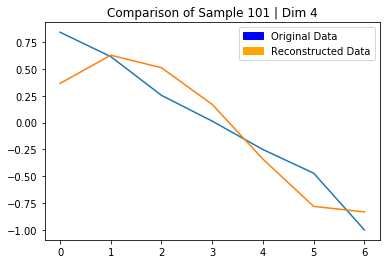

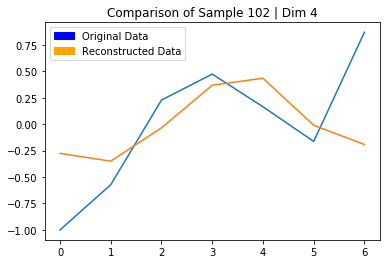

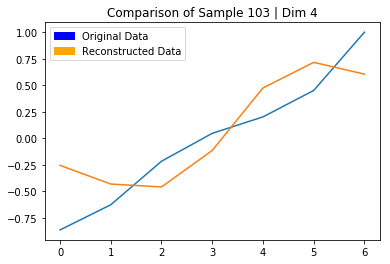

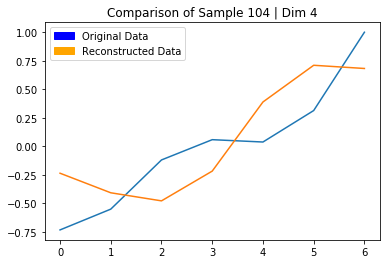

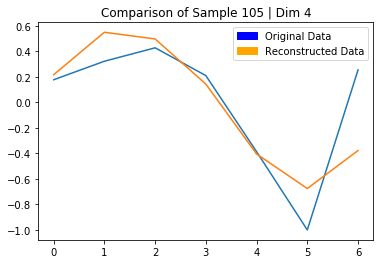

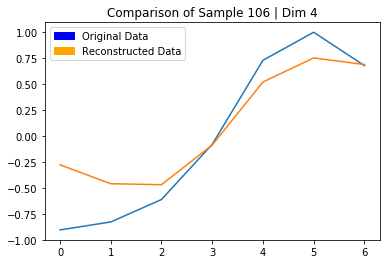

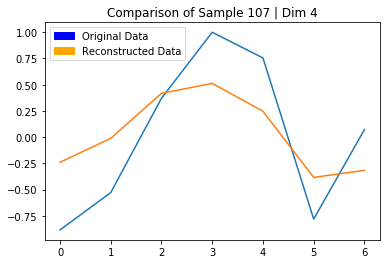

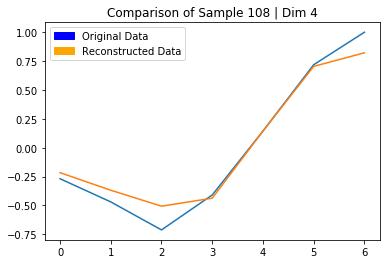

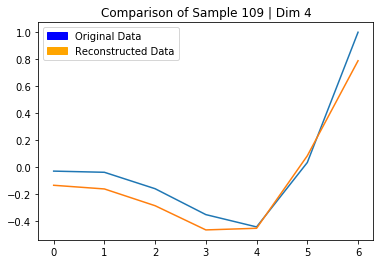

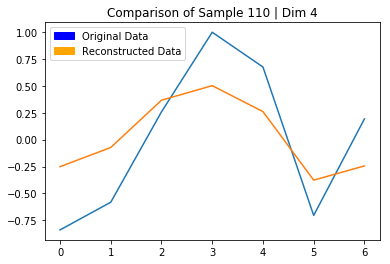

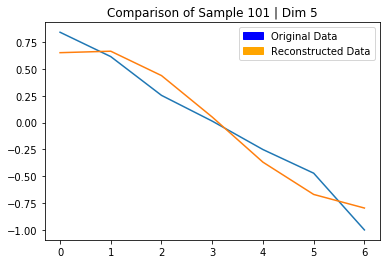

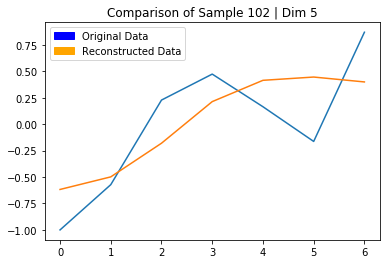

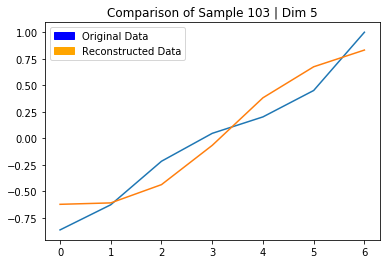

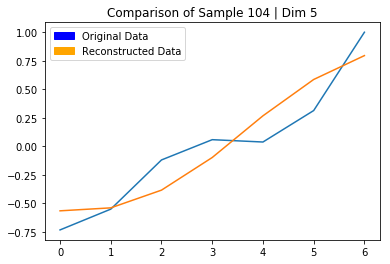

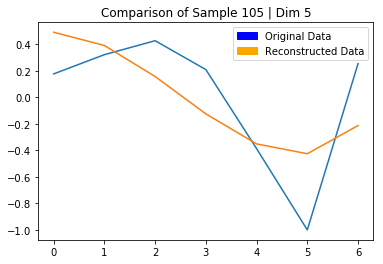

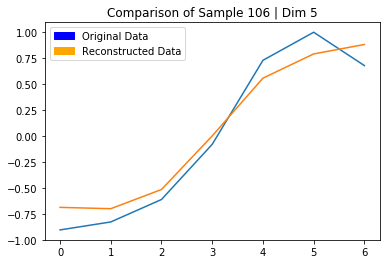

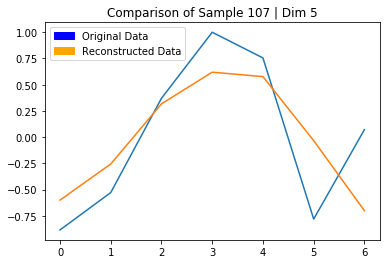

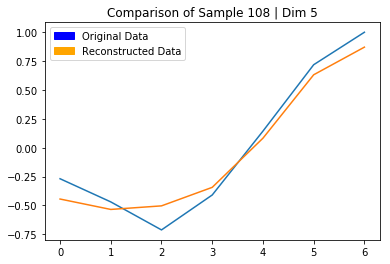

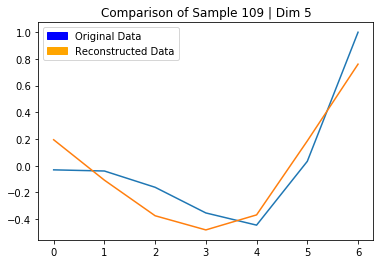

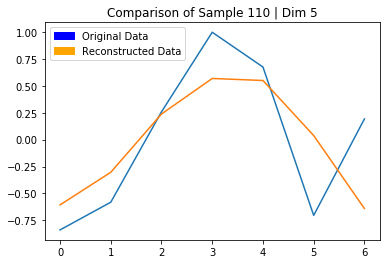

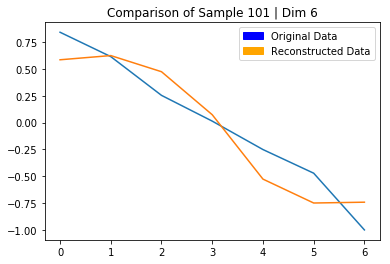

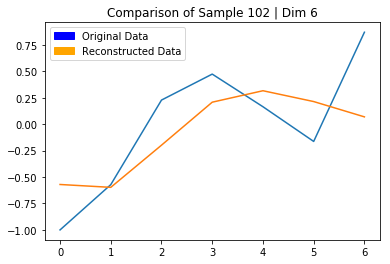

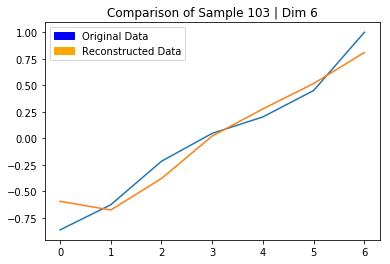

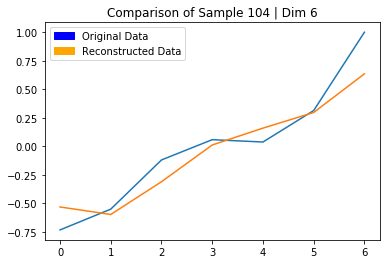

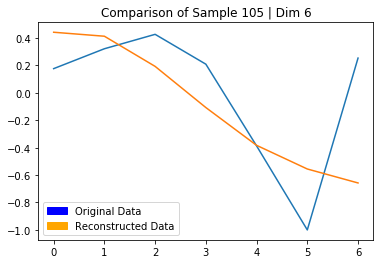

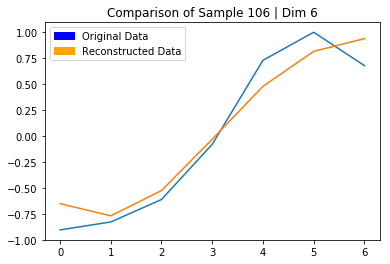

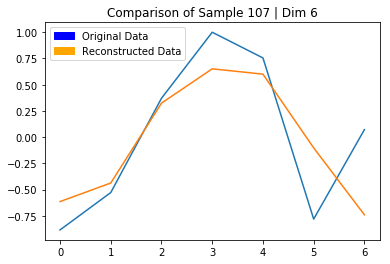

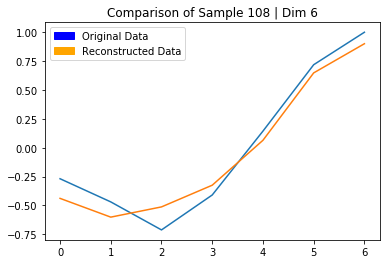

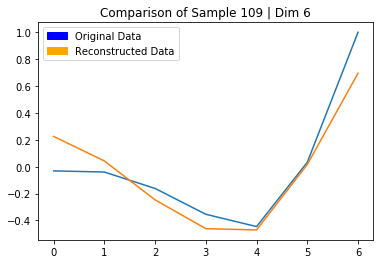

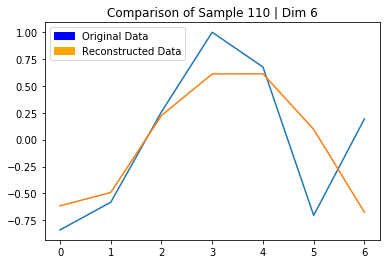

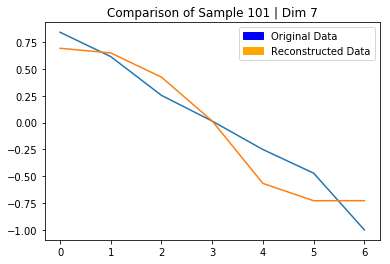

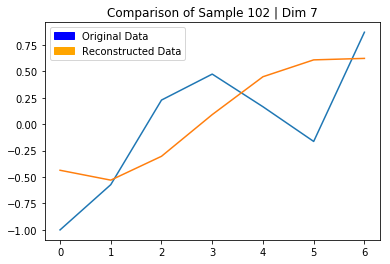

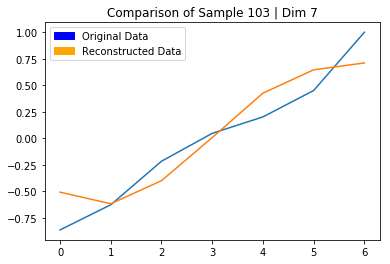

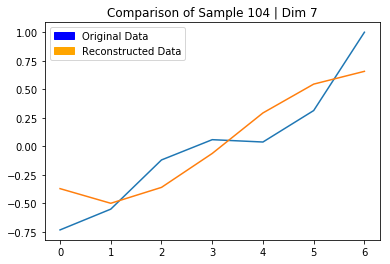

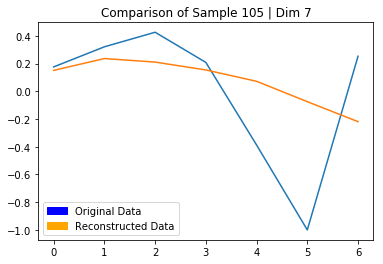

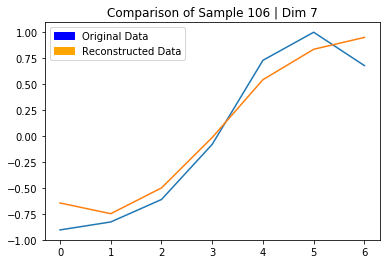

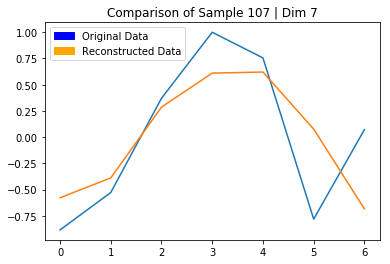

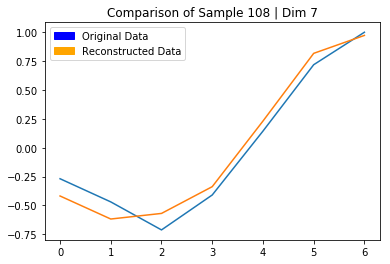

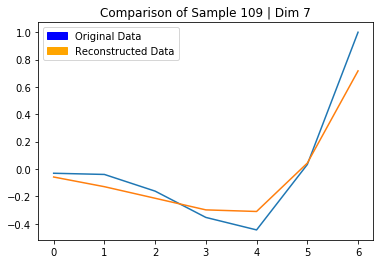

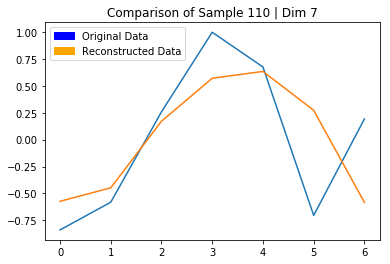

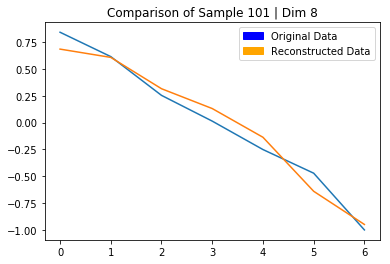

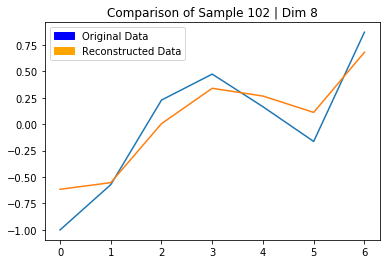

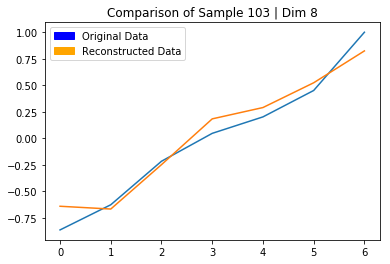

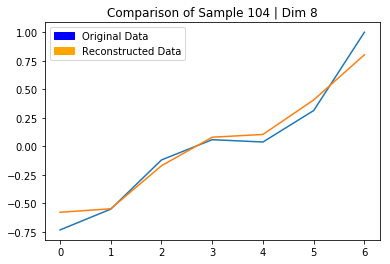

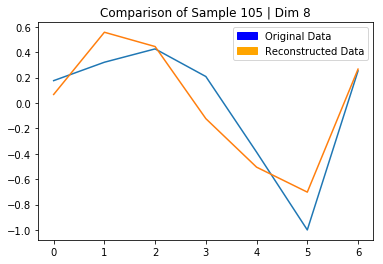

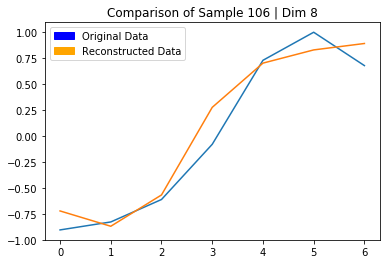

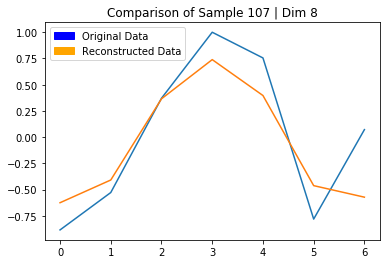

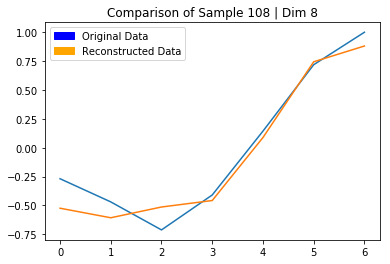

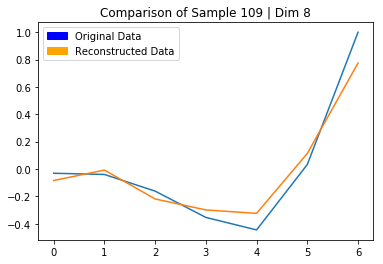

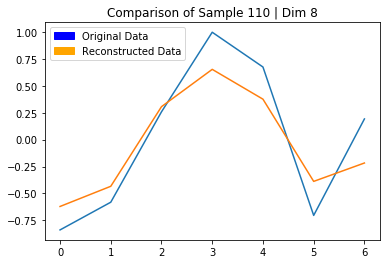

In [72]:
# CONSTRUCT RNN WITH 4 DIMENSIONS
for mid_units in range(4,9):
    inputs = Input(shape=(7,1))
    encoded = LSTM(mid_units)(inputs)
    #add dense layer; fully connected layer that extracts features; dim=3
    midlayer = Dense(3, activation='relu')(encoded)

    decoded_1 = RepeatVector(7)(midlayer)
    decoded_2 = LSTM(mid_units, return_sequences=True)(decoded_1)
    decoded_3 = LSTM(1, return_sequences=True)(decoded_2)


    # build autoencoder
    autoencoder = Model(inputs, decoded_3)
    # build encoder
    encoder = Model(inputs, midlayer)

    # build decoder
    decoder_layer = autoencoder.layers[-1] #get last layer of rnn
    encoded_input = Input(shape=(mid_units, )) #get input dimen
    autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')



    x_train, x_testset = train_test_split(data, test_size=0.4, random_state=20)
    x_test, x_dev = train_test_split(x_testset, test_size=0.5, random_state=20)

    autoencoder.fit(x_train,x_train,epochs=100, validation_data=(x_dev,x_dev))
    decoded_data = autoencoder.predict(x_test)
    
    
    mid_units = str(mid_units)
    
    
    # plot first sample from test set
    for i in range(101,111):
    
        plt.figure()
        sample = i
        plt.plot(x_test[sample])
        plt.plot(decoded_data[sample])
        sample = str(sample)
        blue_patch = mpatches.Patch(color='blue', label='Original Data')
        orange_patch = mpatches.Patch(color='orange', label='Reconstructed Data')
        plt.legend(handles=[blue_patch,orange_patch])
        plt.title('Comparison of Sample ' + sample + ' | Dim ' + mid_units)
        plt.show
        plt.savefig('Dim '+mid_units+'; Sample '+sample+'.png')

#     # plot 2nd sample from test set
#     plt.figure()
#     sample = 1
#     plt.plot(x_test[sample])
#     plt.plot(decoded_data[sample])
#     sample = str(sample)
#     blue_patch = mpatches.Patch(color='blue', label='Original Data')
#     orange_patch = mpatches.Patch(color='orange', label='Reconstructed Data')
#     plt.legend(handles=[blue_patch,orange_patch])
#     plt.title('Comparison of Sample ' + sample + 'Dim ' + mid_units)
#     plt.show
#     plt.savefig('Dim '+mid_units+'; Sample '+sample+'.png')
    
#     # plot 500th sample from test set
#     plt.figure()
#     sample = 499
#     plt.plot(x_test[sample])
#     plt.plot(decoded_data[sample])
#     sample = str(sample)
#     blue_patch = mpatches.Patch(color='blue', label='Original Data')
#     orange_patch = mpatches.Patch(color='orange', label='Reconstructed Data')
#     plt.legend(handles=[blue_patch,orange_patch])
#     plt.title('Comparison of Sample ' + sample + 'Dim ' + mid_units)
#     plt.show
#     plt.savefig('Dim '+mid_units+'; Sample '+sample+'.png')

In [69]:
for i in range(110,111):
    print(i)

110
